In [4]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
train = pd.read_csv('train.csv', index_col = 'PassengerId')
test = pd.read_csv('test.csv')
combine = [train, test]

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [6]:
train.head()

NameError: name 'train' is not defined

In [7]:
train.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Ryerson, Miss. Emily Borie",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
print(train.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [10]:
print(train.dtypes)

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [36]:
print(train.isnull().any())
print('\n\n')

Survived    False
Pclass      False
Name        False
Sex         False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
Embarked     True
dtype: bool





<AxesSubplot:ylabel='PassengerId'>

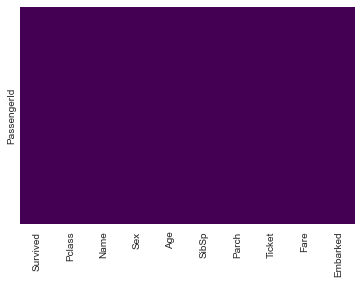

In [40]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [30]:
def cleanage(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 39
        else :
            return 24
    
    else:
        return Age

In [35]:
train['Age']= train[['Age', 'Pclass']].apply(cleanage, axis=1)

In [13]:
train.describe(percentiles = [.61, .62]) 

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
61%,0.000000,3.000000,32.000000,0.000000,0.000000,23.225000
62%,1.000000,3.000000,32.000000,0.000000,0.000000,24.150000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
survived_data = train[train['Survived'] == 1]
survived = survived_data.count().values[1]
percent = (survived/891) * 100
print('The percentage of survivors is {}'.format(percent))

The percentage of survivors is 38.38383838383838


In [17]:
# Hypothesis: Determine if the survival rate is associated to the class of passenger.

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values('Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

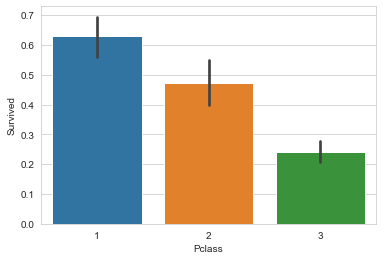

In [6]:
sns.set_style('whitegrid')
sns.barplot(x = "Pclass", y = "Survived", data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

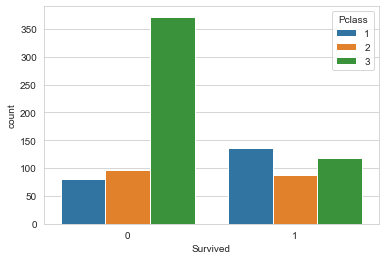

In [13]:
#Hypothesis: Relation between passengers who didn't survive and class of the passenger.

sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

In [20]:
#Hypothesis: Determine if the survival rate is associated to the gender.

train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Survived', ylabel='count'>

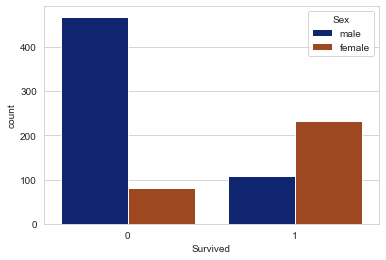

In [11]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", hue="Sex", data=train, palette='dark')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

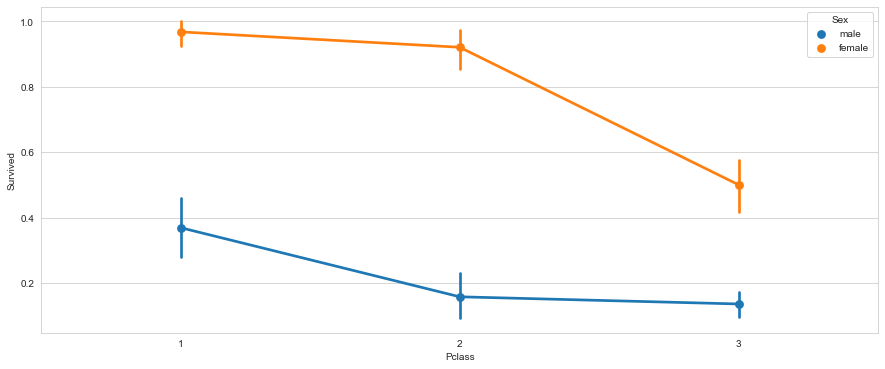

In [7]:
plt.figure(figsize = (15,6))
sns.set_style('whitegrid')
sns.pointplot(data = train, x = 'Pclass', y = 'Survived', hue = 'Sex')

In [24]:
#Hypothesis: Determine if the survival rate is associated to the gender and class of the passenger.

train[['Survived', 'Sex', 'Pclass']].groupby(['Pclass', 'Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

<Figure size 1080x432 with 0 Axes>

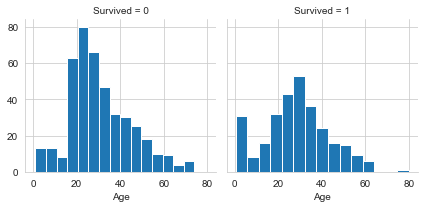

In [8]:
#Hypothesis: Determine if the survival rate is associated to the age.

plt.figure(figsize = (15,6))
sns.set_style('whitegrid')
g = sns.FacetGrid(train, col = 'Survived')
g.map(plt.hist, 'Age', bins = 15)

In [ ]:
#Hypothesis: Relation between passengers who didn't survive and class of the passenger.

sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)